# Example 4 
### 4.1 Dynamic optimal pricing for verifying Theorem 4

In [45]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings("ignore")

V = 3
T = 30

m = 2
#Create Parameters

a1 = 50
a2 = 50
a3 = 30

# Create Optimization Variables
u1 = cp.Variable((m, T), nonneg = True)
y1 = cp.Variable((m, T+1), nonneg = True)
e1 = cp.Variable(T)

u2 = cp.Variable((m, T), nonneg = True)
y2 = cp.Variable((m, T+1), nonneg = True)
e2 = cp.Variable(T)

u3 = cp.Variable((m, T), nonneg = True)
y3 = cp.Variable((m, T+1), nonneg = True)
e3 = cp.Variable(T)



# Initial Conditions
A1 = np.array([[-0.6,0],[0,-0.7]])
A2 = np.array([[-0.5,0],[0,-0.2]])
A3 = np.array([[-0.4,0],[0,-0.8]])
# A1 = np.array([[0.6,0],[0,0.7]])
# A2 = np.array([[0.5,0],[0,0.4]])
# A3 = np.array([[0.5,0],[0,0.7]])

B1 = np.array([[2,0],[0,7]])
B2 = np.array([[4,0],[0,6]])
B3 = np.array([[9,0],[0,3]])
Q1,Q2,Q3 = np.array([[-5,0],[0,-4]]), np.array([[-1,0],[0,-6]]), np.array([[-3,0],[0,-2]])
R1,R2,R3 = np.array([[-5,0],[0,-8]]), np.array([[-3,0],[0,-7]]), np.array([[-2,0],[0,-1]])
K1, K2, K3  = np.array([50,60]), np.array([50,20]), np.array([80,20])
W1, W2, W3  = np.array([200,300]), np.array([200,400]), np.array([450,300])
y_initial = np.array([[1,2,3],[4,5,3]])


H1,H2,H3 = np.array([[5,0],[0,5]]), np.array([[3,0],[0,1]]), np.array([[7,0],[0,8]])


h1 = [cp.quad_form(u1[:,t],H1) for t in range(0,T)]
h2 = [cp.quad_form(u2[:,t],H2) for t in range(0,T)]
h3 = [cp.quad_form(u3[:,t],H3) for t in range(0,T)]

constraints = [y1[:, 1:] == A1 @ y1[:, :-1] + B1 @ u1[:,:],
                   y2[:, 1:] == A2 @ y2[:, :-1] + B2 @ u2[:, :],
                   y3[:, 1:] == A3 @ y3[:,:-1] + B3 @ u3[:,:]]
    
for t in range(0,T):
    constraints.append(e1[t] <= a1 - h1[t])
    constraints.append(e2[t] <= a2 - h2[t])
    constraints.append(e3[t] <= a3 - h3[t])
    constraints.append(e1[t] + e2[t] + e3[t] == 0)
    
constraints.append(y1[:,0] == y_initial[:,0])
constraints.append(y2[:,0] == y_initial[:,1])
constraints.append(y3[:,0] == y_initial[:,2])


tmp1 = 0
tmp2 = 0
tmp3 = 0
for t in range(0,T):
    tmp1 = tmp1 + (cp.quad_form(y1[:,t],R1) + W1 @ y1[:,t] + cp.quad_form(u1[:,t],Q1) + K1 @ u1[:,t])
    tmp2 = tmp2 + (cp.quad_form(y2[:,t],R2) + W2 @ y2[:,t] + cp.quad_form(u2[:,t],Q2) + K2 @ u2[:,t])
    tmp3 = tmp3 + (cp.quad_form(y3[:,t],R3) + W3 @ y3[:,t] + cp.quad_form(u3[:,t],Q3) + K3 @ u3[:,t])
tmp1 = tmp1 + cp.quad_form(y1[:,T],R1) + W1 @ y1[:,T]
tmp2 = tmp2 + cp.quad_form(y2[:,T],R2) + W2 @ y2[:,T]
tmp3 = tmp3 + cp.quad_form(y3[:,T],R3) + W3 @ y3[:,T]

obj = cp.Maximize(tmp1+tmp2+tmp3)
prob = cp.Problem(obj,constraints)
prob.solve()
print("status:", prob.status)
print(prob.value)


Lambda = []

for t in range(1,T+1):
    Lambda.append(-constraints[2+4*t].dual_value)


status: optimal
542248.9854543412


In [46]:
fontsize = 20
fontproperties={"size":12,'weight':'bold'}
#fig, axes = plt.subplots(3, 2, figsize = (14,14))
swe_u1, swe_u2, swe_u3 = u1.value, u2.value, u3.value
swe_e1, swe_e2, swe_e3 = e1.value, e2.value, e3.value
swe_y1, swe_y2, swe_y3 = y1.value, y2.value, y3.value
u = [swe_u1[:,:], swe_u2[:,:], swe_u3[:,:]]
e = [swe_e1[:], swe_e2[:], swe_e3[:]]
y = [swe_y1[:,:], swe_y2[:,:], swe_y3[:,:]]

In [47]:
tmp1 = 0
tmp2 = 0
tmp3 = 0
for t in range(0,T):
    tmp1 = tmp1 + (cp.quad_form(y1[:,t],R1) + W1 @ y1[:,t] + cp.quad_form(u1[:,t],Q1) + K1 @ u1[:,t] + Lambda[t]*e1[t])
    tmp2 = tmp2 + (cp.quad_form(y2[:,t],R2) + W2 @ y2[:,t] + cp.quad_form(u2[:,t],Q2) + K2 @ u2[:,t] + Lambda[t]*e2[t])
    tmp3 = tmp3 + (cp.quad_form(y3[:,t],R3) + W3 @ y3[:,t] + cp.quad_form(u3[:,t],Q3) + K3 @ u3[:,t] + Lambda[t]*e3[t])
tmp1 = tmp1 + cp.quad_form(y1[:,T],R1) + W1 @ y1[:,T]
tmp2 = tmp2 + cp.quad_form(y2[:,T],R2) + W2 @ y2[:,T]
tmp3 = tmp3 + cp.quad_form(y3[:,T],R3) + W3 @ y3[:,T]


constraints1 = [y1[:, 1:] == A1 @ y1[:, :-1] + B1 @ u1[:,:]] 
for t in range(0,T):
    constraints1.append(e1[t] <= a1 - h1[t])
constraints1.append(y1[:,0] == y_initial[:,0])


constraints2 = [y2[:, 1:] == A2 @ y2[:, :-1] + B2 @ u2[:, :]]
for t in range(0,T):
    constraints2.append(e2[t] <= a2 - h2[t]) 
constraints2.append(y2[:,0] == y_initial[:,1])


constraints3 = [y3[:, 1:] == A3 @ y3[:,:-1] + B3 @ u3[:,:]]  
for t in range(0,T):
    constraints3.append(e3[t] <= a3 - h3[t])
constraints3.append(y3[:,0] == y_initial[:,2])



obj1 = cp.Maximize(tmp1)
prob1 = cp.Problem(obj1,constraints1)
prob1.solve()

obj2 = cp.Maximize(tmp2)
prob2 = cp.Problem(obj2,constraints2)
prob2.solve()

obj3 = cp.Maximize(tmp3)
prob3 = cp.Problem(obj3,constraints3)
prob3.solve()



206469.08461939194

In [48]:
fontsize = 20
fontproperties={"size":12,'weight':'bold'}
#fig, axes = plt.subplots(3, 2, figsize = (14,14))
ce_u1, ce_u2, ce_u3 = u1.value, u2.value, u3.value
ce_e1, ce_e2, ce_e3 = e1.value, e2.value, e3.value
ce_y1, ce_y2, ce_y3 = y1.value, y2.value, y3.value
u = [ce_u1[:,:], ce_u2[:,:], ce_u3[:,:]]
e = [ce_e1[:], ce_e2[:], ce_e3[:]]
y = [ce_y1[:,:], ce_y2[:,:], ce_y3[:,:]]

[0.3 0.6 0.9 1.2 1.5 1.8 2.1]
[1.2 1.8 2.4 3.  3.6 4.2 4.8]
[0.  0.6 1.2 1.8 2.4 3.  3.6 4.2]
[32.  32.8 33.6 34.4 35.2 36.  36.8]
[21.5 22.  22.5 23.  23.5 24.  24.5]
[-61. -60. -59. -58. -57. -56. -55.]


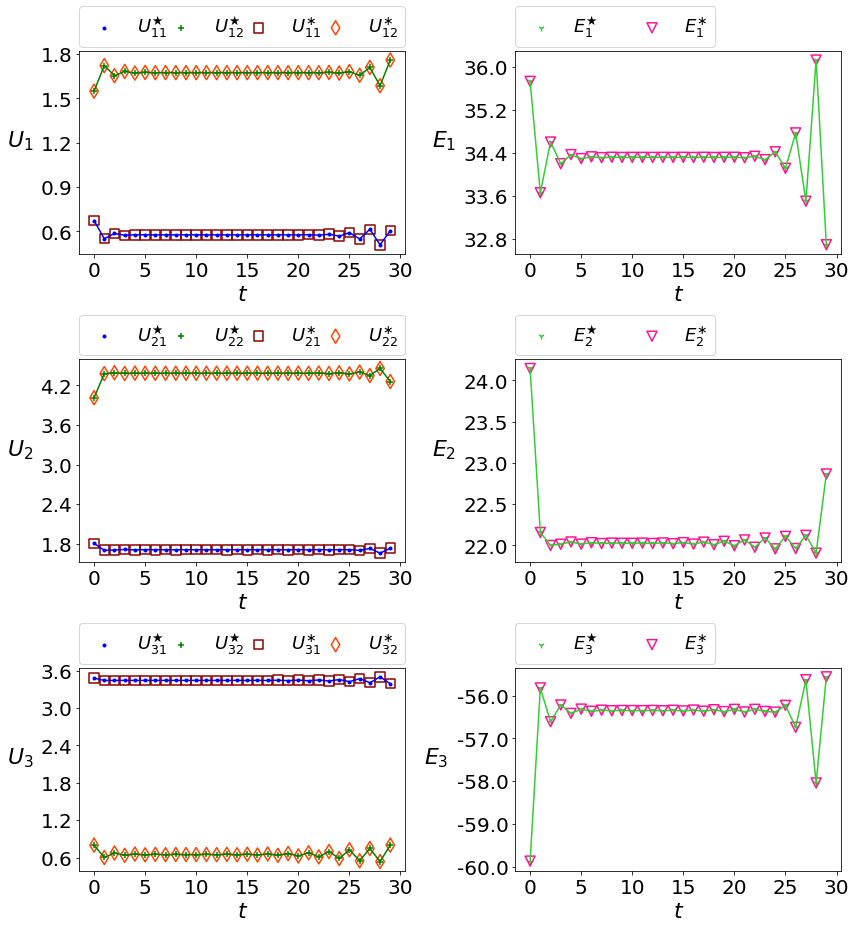

In [55]:
from matplotlib.ticker import MaxNLocator
t = [i for i in range(0,T)]
fontsize = 22
fontproperties={"size":20}
fig, axes = plt.subplots(3, 2, figsize = (12,13))

# U
ax = axes[0,0]
axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax.scatter(t, swe_u1[0,:], marker = '.', c='blue', label = r'$  U^{\bigstar}_{11}}$')
ax.scatter(t, swe_u1[1,:], marker = '+', c='green', label = r'$  U^{\bigstar}_{12}}$')
ax.scatter(t, ce_u1[0,:], marker='s', linewidths=1.5, s = 90,facecolors='none', edgecolors='darkred', label = r'$  U^{\ast}_{11}}$')
ax.scatter(t, ce_u1[1,:], marker='d', linewidths=1.5, s = 100, facecolors='none', edgecolors='orangered', label = r'$  U^{\ast}_{12}}$')
print(ax.get_yticks())
ax.set_yticklabels(np.round(ax.get_yticks(),2), fontproperties) 
#ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5,  1.75], fontproperties) 
ax.plot(swe_u1[0,:], c='blue')
ax.plot(swe_u1[1,:], c='green')

ax = axes[1,0]
axes[1,0].yaxis.set_major_locator(plt.MaxNLocator(6))
ax.scatter(t, swe_u2[0,:], marker = '.', c='blue', label = r'$  U^{\bigstar}_{21}}$')
ax.scatter(t, swe_u2[1,:], marker = '+', c='green', label = r'$  U^{\bigstar}_{22}}$')
ax.scatter(t, ce_u2[0,:], marker='s', linewidths=1.5, s = 90,facecolors='none', edgecolors='darkred', label = r'$  U^{\ast}_{21}}$')
ax.scatter(t, ce_u2[1,:], marker='d', linewidths=1.5, s = 100, facecolors='none', edgecolors='orangered', label = r'$  U^{\ast}_{22}}$')
print(ax.get_yticks())
ax.set_yticklabels(np.round(ax.get_yticks(),2), fontproperties) 
ax.plot(swe_u2[0,:], c='blue')
ax.plot(swe_u2[1,:], c='green')

ax = axes[2,0]
axes[2,0].yaxis.set_major_locator(plt.MaxNLocator(6))
ax.scatter(t, swe_u3[0,:], marker = '.', c='blue', label = r'$  U^{\bigstar}_{31}}$')
ax.scatter(t, swe_u3[1,:], marker = '+', c='green', label = r'$  U^{\bigstar}_{32}}$')
ax.scatter(t, ce_u3[0,:], marker='s', linewidths=1.5, s = 90,facecolors='none', edgecolors='darkred', label = r'$  U^{\ast}_{31}}$')
ax.scatter(t, ce_u3[1,:], marker='d', linewidths=1.5, s = 100, facecolors='none', edgecolors='orangered', label = r'$  U^{\ast}_{32}}$')
print(ax.get_yticks())
ax.set_yticklabels(np.round(ax.get_yticks(),2), fontproperties) 
ax.plot(swe_u3[0,:], c='blue')
ax.plot(swe_u3[1,:], c='green')

# E
ax = axes[0,1]
axes[0,1].yaxis.set_major_locator(plt.MaxNLocator(6))
ax.scatter(t, swe_e1, marker = '1', c='limegreen', label = r'$  E^{\bigstar}_{1}}$')
ax.scatter(t, ce_e1, marker='v', linewidths=1.5, s = 100,facecolors='none', edgecolors='deeppink', label = r'$  E^{\ast}_{1}}$')
print(ax.get_yticks())
ax.set_yticklabels(np.round(ax.get_yticks(),2), fontproperties)
ax.plot(swe_e1, linewidth=1.5, c='limegreen')

ax = axes[1,1]
axes[1,1].yaxis.set_major_locator(plt.MaxNLocator(6))
ax.scatter(t, swe_e2, marker = '1', c='limegreen', label = r'$  E^{\bigstar}_{2}}$')
ax.scatter(t, ce_e2, marker='v', linewidths=1.5, s = 100,facecolors='none', edgecolors='deeppink', label = r'$  E^{\ast}_{2}}$')
print(ax.get_yticks())
ax.set_yticklabels(np.round(ax.get_yticks(),2), fontproperties) 
ax.plot(swe_e2, linewidth=1.5, c='limegreen')

ax = axes[2,1]
axes[2,1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax.scatter(t, swe_e3, marker = '1', c='limegreen', label = r'$  E^{\bigstar}_{3}}$')
ax.scatter(t, ce_e3, marker='v', linewidths=1.5, s = 100,facecolors='none', edgecolors='deeppink', label = r'$  E^{\ast}_{3}}$')
print(ax.get_yticks())
ax.set_yticklabels(np.round(ax.get_yticks(),2), fontproperties) 
ax.plot(swe_e3, linewidth=1.5, c='limegreen')

for col in range(2):
    for row in range(3):
        ax = axes[row,col]
        if col == 0 :
            ax.set_xlabel('$t$', fontsize=fontsize)
            ax.set_ylabel(r'$ U_{}$'.format(str(row+1)), fontsize=fontsize, rotation = 0, labelpad=20)
            xticks = (int(x) for x in ax.get_xticks())
            ax.set_xticklabels(xticks, fontproperties)
#             ax.legend(loc = 1, framealpha = 0.5, fontsize = 14)
            ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.,fontsize = 18)
        else:
            ax.set_xlabel('$t$', fontsize=fontsize)
            ax.set_ylabel(r'$ E_{}$'.format(str(row+1)), fontsize=fontsize, rotation = 0, labelpad=20)
            xticks = [int(x) for x in ax.get_xticks()]
            ax.set_xticklabels(xticks, fontproperties) 
#             ax.legend(loc = 1, framealpha = 0.5, fontsize = 14)
            ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, borderaxespad=0.,fontsize = 18)


plt.tight_layout()
plt.show()
fig.savefig('./dynamic_swe_ce_lines.png')

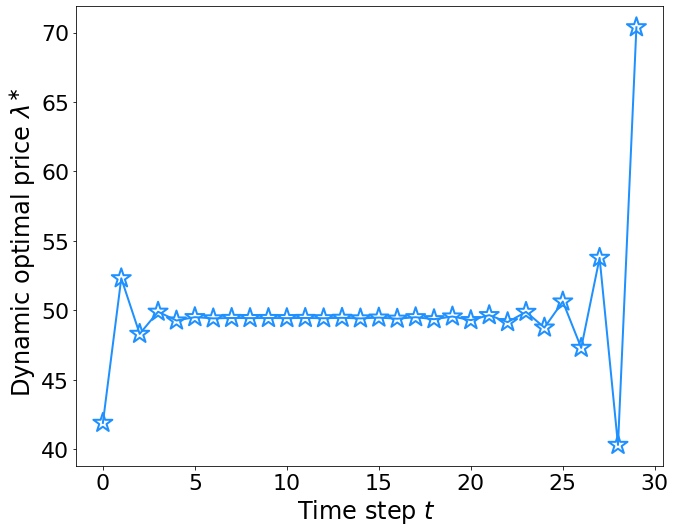

In [50]:
fig2 = plt.figure(figsize = (9.5,7.5))
plt.scatter(t, Lambda, marker = '*', linewidths=2, s=400, facecolors='none', edgecolors='dodgerblue')
plt.plot(Lambda,c='dodgerblue',linewidth=2)
plt.ylabel(r'Dynamic optimal price $\lambda^{\ast}$  ', fontsize = 24)
plt.yticks(fontsize = 22)
plt.xlabel(r'Time step $t$  ',rotation = 0,fontsize = 24)
plt.xticks(fontsize = 22)
plt.tight_layout()
plt.show()
fig2.savefig('./dynamic_optimal_price_line.png')